In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA().fit(X=x, y=y["0"])
x = clf.transform(x)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(x)
labels = pd.Series(data=kmeans.labels_)
result = pd.concat([labels, y], axis=1)
result.columns=["cluster","diagnosis"]
cluster0 = result.loc[result.cluster==0]
cluster1 = result.loc[result.cluster==1]

In [4]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=2, n_init=10).fit_predict(x)
EMlabels = pd.Series(data=EM)
EMresult = pd.concat([EMlabels, y], axis=1)
EMresult.columns=["cluster","diagnosis"]
EMcluster0 = EMresult.loc[EMresult.cluster==0]
EMcluster1 = EMresult.loc[EMresult.cluster==1]

Text(0.5, -0.05, 'Figure 12. Breast Cancer Dataset with LDA, on training set')

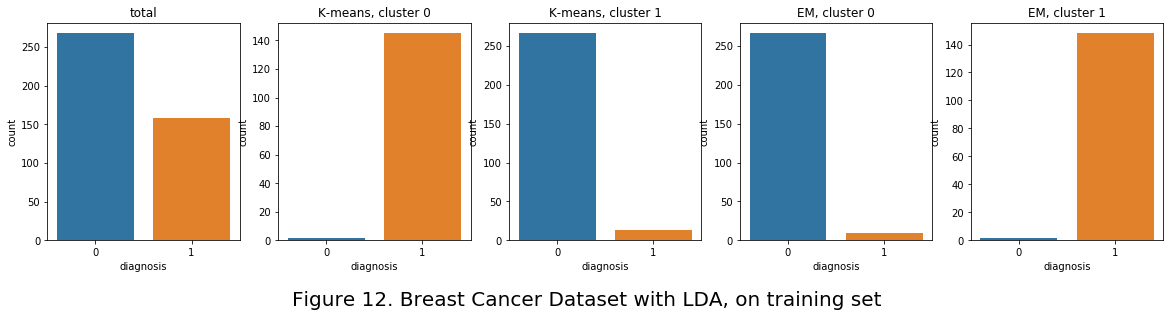

In [5]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
sns.countplot(data=result, x="diagnosis", ax=axs[0]).set_title("total")
sns.countplot(data=cluster0, x="diagnosis", ax=axs[1]).set_title("K-means, cluster 0")
sns.countplot(data=cluster1, x="diagnosis", ax=axs[2]).set_title("K-means, cluster 1")
sns.countplot(data=EMcluster0, x="diagnosis", ax=axs[3]).set_title("EM, cluster 0")
sns.countplot(data=EMcluster1, x="diagnosis", ax=axs[4]).set_title("EM, cluster 1")
fig.suptitle("Figure 12. Breast Cancer Dataset with LDA, on training set", fontsize=20,y=-0.05)

In [6]:
x1 = pd.read_csv("BC_Xtest.csv").drop(columns=["Unnamed: 0"])
y1 = pd.read_csv("BC_ytest.csv").drop(columns=["Unnamed: 0"])
x1 = clf.transform(x1)

In [7]:
kmeans = KMeans(n_clusters=2).fit(x1)
labels = pd.Series(data=kmeans.labels_)
result = pd.concat([labels, y1], axis=1)
result.columns=["cluster","diagnosis"]
cluster0 = result.loc[result.cluster==0]
cluster1 = result.loc[result.cluster==1]

In [8]:
EM = GaussianMixture(n_components=2, n_init=10).fit_predict(x1)
EMlabels = pd.Series(data=EM)
EMresult = pd.concat([EMlabels, y1], axis=1)
EMresult.columns=["cluster","diagnosis"]
EMcluster0 = EMresult.loc[EMresult.cluster==0]
EMcluster1 = EMresult.loc[EMresult.cluster==1]

Text(0.5, -0.05, 'Figure 12. Breast Cancer Dataset with LDA, on test set')

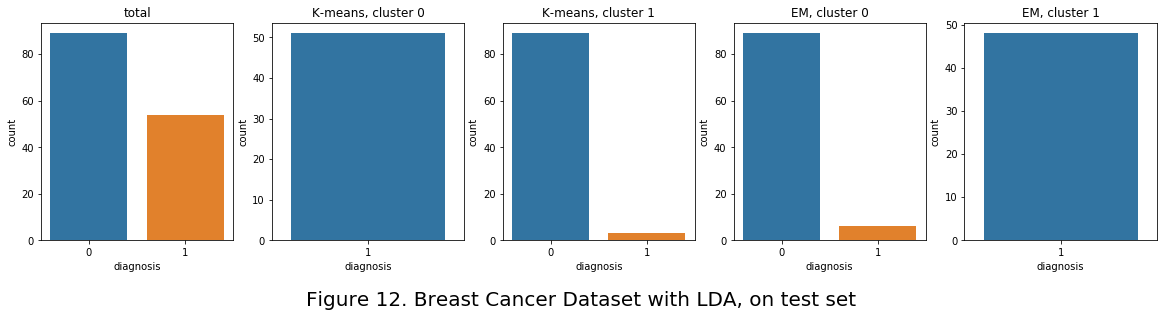

In [9]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
sns.countplot(data=result, x="diagnosis", ax=axs[0]).set_title("total")
sns.countplot(data=cluster0, x="diagnosis", ax=axs[1]).set_title("K-means, cluster 0")
sns.countplot(data=cluster1, x="diagnosis", ax=axs[2]).set_title("K-means, cluster 1")
sns.countplot(data=EMcluster0, x="diagnosis", ax=axs[3]).set_title("EM, cluster 0")
sns.countplot(data=EMcluster1, x="diagnosis", ax=axs[4]).set_title("EM, cluster 1")
fig.suptitle("Figure 12. Breast Cancer Dataset with LDA, on test set", fontsize=20,y=-0.05)

In [10]:
###########ANN
x_train = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])
x_test = pd.read_csv("BC_Xtest.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("BC_ytest.csv").drop(columns=["Unnamed: 0"])
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [11]:
x_train1 = clf.transform(x_train)
x_test1 = clf.transform(x_test)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
#train on original dataset
clf = MLPClassifier(max_iter=10000, activation='logistic', hidden_layer_sizes=10)
t = time.time()
clf.fit(x_train, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train))
test_acc = accuracy_score(y_test,clf.predict(x_test))
print("Original: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Original: time 381ms, train accuracy 0.9859, test accuracy 0.9860


In [14]:
#train on transformed dataset
t = time.time()
clf.fit(x_train1, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train1))
test_acc = accuracy_score(y_test,clf.predict(x_test1))
print("LDA: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

LDA: time 404ms, train accuracy 0.9765, test accuracy 0.9860
